<a href="https://colab.research.google.com/github/areegtarek/Huawei-HCIA-AI/blob/main/2-%20Boston%20House%20Prices%20Prediction/Boston_Linear_Regression_with_Keras_on_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Boston House Prices**

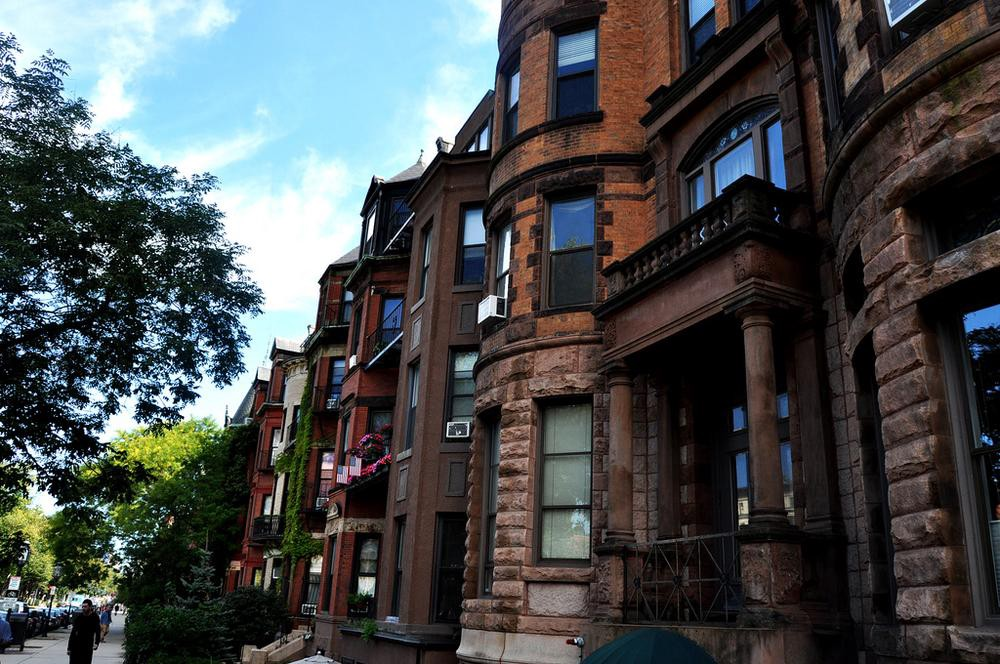

# **Data Describtion**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [ ]:
#Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_boston

In [ ]:
#load the dataset
data = load_boston()
#convert the dataset into a Pandas dataframe and add the target column named 'Price'
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **exploratory data analysis(EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum() #checking for total null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.corr().style.background_gradient(cmap='Oranges')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# **PCA Dimension Reduction**

In [ ]:
#compress the columns 'DIS', 'RAD', 'INDUS' into 1 column
pca = PCA(n_components=1)
#call the compressed column 'new'
df['new'] = pca.fit_transform(df[['DIS', 'RAD', 'INDUS']])
#drop the three columns from the dataset
df = df.drop(['DIS', 'RAD', 'INDUS'], axis=1)

In [ ]:
df.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT,Price,new
0,0.00632,18.0,0.0,0.538,6.575,65.2,296.0,15.3,396.90,4.98,24.0,-11.967456
1,0.02731,0.0,0.0,0.469,6.421,78.9,242.0,17.8,396.90,9.14,21.6,-8.607969
2,0.02729,0.0,0.0,0.469,7.185,61.1,242.0,17.8,392.83,4.03,34.7,-8.607969
3,0.03237,0.0,0.0,0.458,6.998,45.8,222.0,18.7,394.63,2.94,33.4,-10.670296
4,0.06905,0.0,0.0,0.458,7.147,54.2,222.0,18.7,396.90,5.33,36.2,-10.670296


# **Features Distribution**

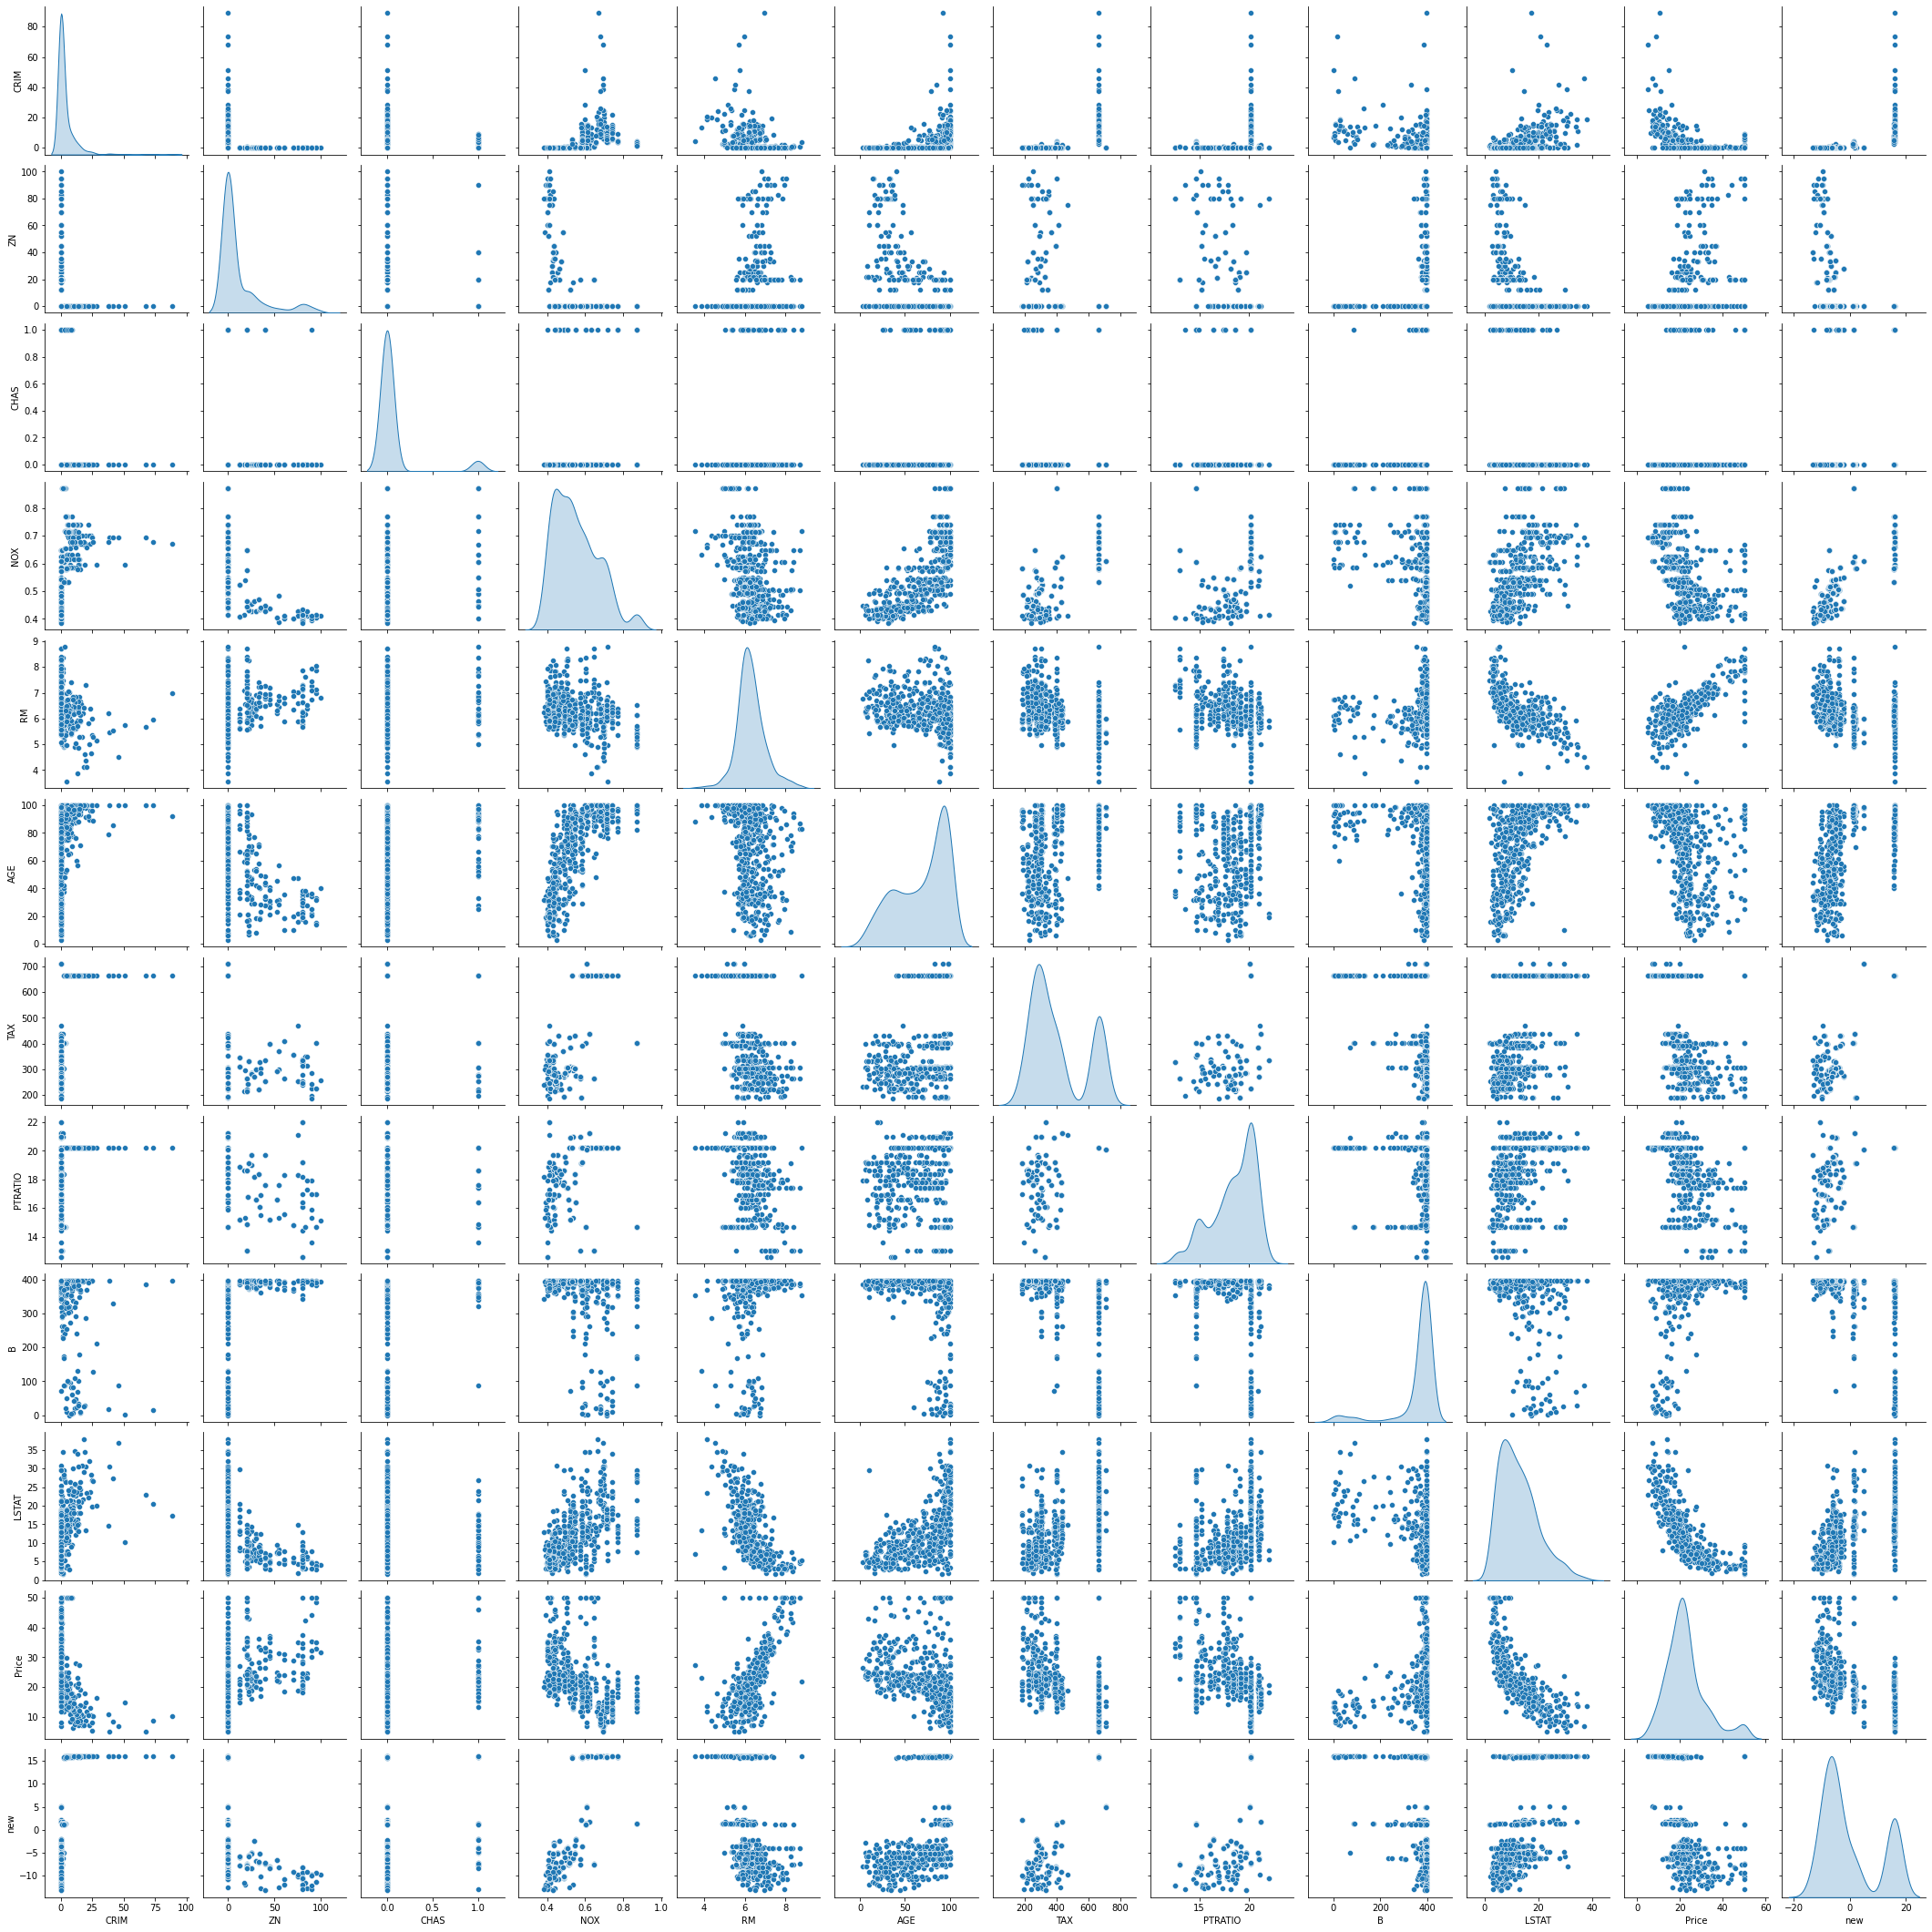

In [ ]:
sns.pairplot(df[['CRIM',	'ZN',	'CHAS',	'NOX'	,'RM',	'AGE',	'TAX',	'PTRATIO',	'B'	,'LSTAT'	,'Price',	'new']], diag_kind='kde')

We select 3 correlated features with high VIF (NOX, RM, TAX) and 2 features with low VIF (LSTAT, new). 

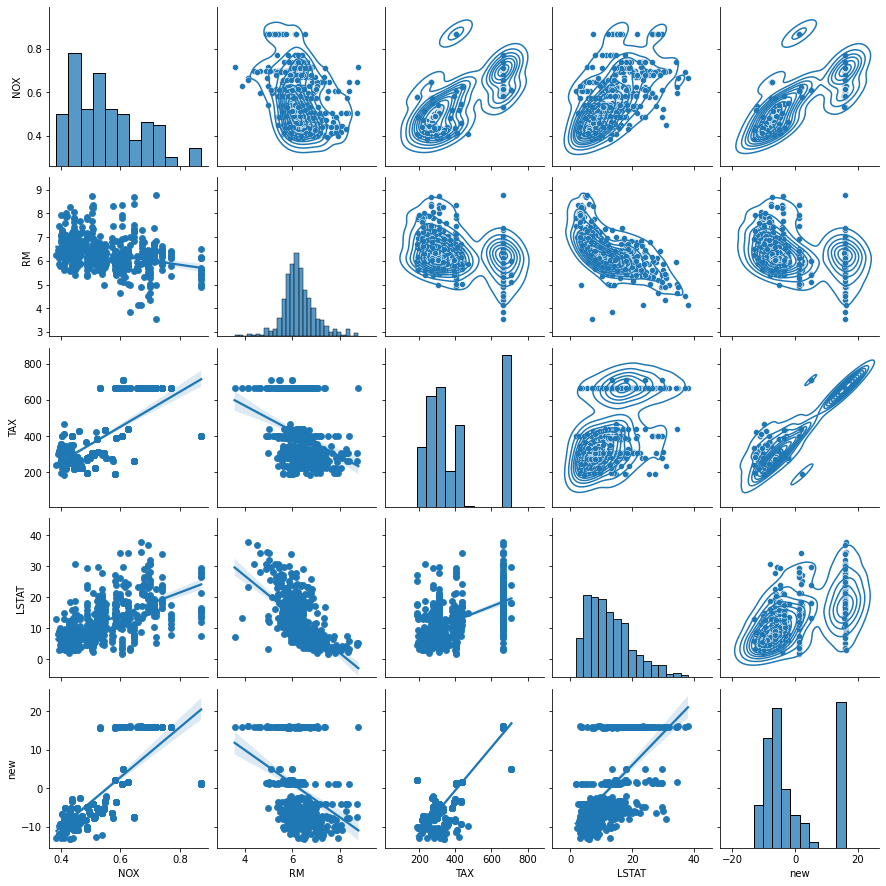

In [ ]:
#print a pairplot to check the relationships between strongly correlated features
pp = sns.pairplot(df[['NOX', 'RM', 'TAX', 'LSTAT', 'new']])
pp = pp.map_lower(sns.regplot)
pp = pp.map_upper(sns.kdeplot);

# **Handling Outliers**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


''

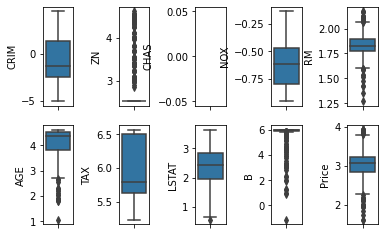

In [ ]:
df1 = df.copy()
# # Create a figure with 10 subplots with a width spacing of 1.5    
fig, ax = plt.subplots(2,5)
fig.subplots_adjust(wspace=1.5)

# Create a boxplot for the continuous features      
box_plot1 = sns.boxplot(y=np.log(df1[df1.columns[0]]), ax=ax[0][0])
box_plot2 = sns.boxplot(y=np.log(df1[df1.columns[1]]), ax=ax[0][1])
box_plot3 = sns.boxplot(y=np.log(df1[df1.columns[2]]), ax=ax[0][2])
box_plot4 = sns.boxplot(y=np.log(df1[df1.columns[3]]), ax=ax[0][3])
box_plot5 = sns.boxplot(y=np.log(df1[df1.columns[4]]), ax=ax[0][4])
box_plot6 = sns.boxplot(y=np.log(df1[df1.columns[5]]), ax=ax[1][0])
box_plot7 = sns.boxplot(y=np.log(df1[df1.columns[6]]), ax=ax[1][1])
box_plot8 = sns.boxplot(y=np.log(df1[df1.columns[-3]]), ax=ax[1][2])
box_plot9 = sns.boxplot(y=np.log(df1[df1.columns[8]]), ax=ax[1][3])
box_plot10 = sns.boxplot(y=np.log(df1[df1.columns[10]]), ax=ax[1][4])
;

# **Preparing Data for Model**

In [ ]:
#One-Hot Encode the CHAS column
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)
#define the features and the labels, X and y
X = df.drop(['Price'], axis=1)
y = df['Price']


In [ ]:
#rescale the data to be robust to outliers
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#split the features and labels into  train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(1, input_dim=11, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 1s 22ms/step - loss: 606.5306 - mse: 606.5306 - mae: 22.7165 - val_loss: 579.7773 - val_mse: 579.7773 - val_mae: 22.0272
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 604.0768 - mse: 604.0768 - mae: 22.6602 - val_loss: 577.7648 - val_mse: 577.7648 - val_mae: 21.9852
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 601.8057 - mse: 601.8057 - mae: 22.6058 - val_loss: 575.7466 - val_mse: 575.7466 - val_mae: 21.9423
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 599.4470 - mse: 599.4470 - mae: 22.5520 - val_loss: 573.8276 - val_mse: 573.8276 - val_mae: 21.9007
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 597.2178 - mse: 597.2178 - mae: 22.4992 - val_loss: 571.9270 - val_mse: 571.9270 - val_mae: 21.8589
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 594.9726 - mse: 594.9726 - mae: 22.4452 - val_loss: 569.9401 

# **Evaluating the Model**

In [ ]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 25ms/step - loss: 365.1075 - mse: 365.1075 - mae: 16.7679


[365.1074523925781, 365.1074523925781, 16.767915725708008]

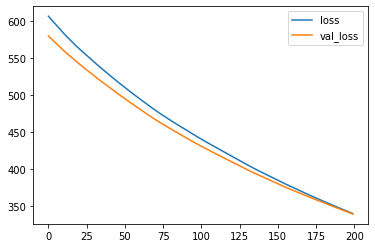

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

# **the model predicts VS its actual value**

4/4 [==============================] - 0s 3ms/step


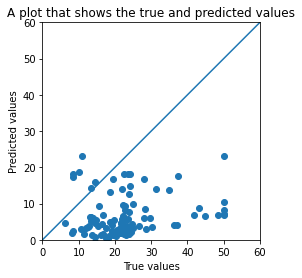

In [ ]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])


# **Building a Multilayer Neural Network**

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 1s 19ms/step - loss: 594.4807 - mse: 594.4807 - mae: 22.7158 - val_loss: 568.4674 - val_mse: 568.4674 - val_mae: 21.9414
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 591.3080 - mse: 591.3080 - mae: 22.6381 - val_loss: 566.9213 - val_mse: 566.9213 - val_mae: 21.9037
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 589.2173 - mse: 589.2173 - mae: 22.5908 - val_loss: 565.2655 - val_mse: 565.2655 - val_mae: 21.8709
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 587.2103 - mse: 587.2103 - mae: 22.5515 - val_loss: 563.3198 - val_mse: 563.3198 - val_mae: 21.8337
Epoch 5/200
11/11 [==============================] - 0s 8ms/step - loss: 584.9330 - mse: 584.9330 - mae: 22.5071 - val_loss: 560.9504 - val_mse: 560.9504 - val_mae: 21.7886
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 582.0274 - mse: 582.0274 - mae: 22.4515 - val_loss: 557.7775 

# **Evaluating the Model**

In [ ]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 20ms/step - loss: 12.5485 - mse: 12.5485 - mae: 2.6496


[12.54852294921875, 12.54852294921875, 2.6495792865753174]

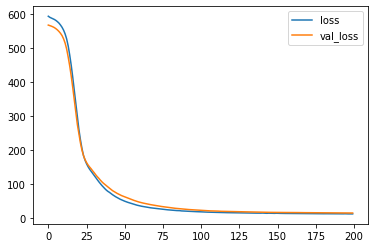

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

# **the model predicts VS its actual value**

4/4 [==============================] - 0s 3ms/step


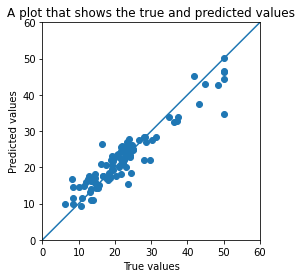

In [ ]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])
